In [33]:
%matplotlib inline
#Doruk ÖZER 70192
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
df = pd.read_csv('Toyota_Sales.csv', index_col=0) # let's data into dataframe df
training_set= df[:96]# seperating data into training set
test_set= df[96:]# seperating data into test set
df.head() 

,Index,Sales,t,tsq,tcube,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,,,,,,
1/1/2006,1,808,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2/1/2006,2,969,2,4,8,0,1,0,0,0,0,0,0,0,0,0,0
3/1/2006,3,1475,3,9,27,0,0,1,0,0,0,0,0,0,0,0,0
4/1/2006,4,1439,4,16,64,0,0,0,1,0,0,0,0,0,0,0,0
5/1/2006,5,1394,5,25,125,0,0,0,0,1,0,0,0,0,0,0,0


In [35]:
 # Running a linear regression with 11 dummies (no dummy at May) with t,tsq and tcube
lm = sm.OLS.from_formula('Sales ~ t + tsq + tcube + Jan + Feb + Mar + Apr + Jun + Jul + Aug + Sep + Oct + Nov + Dec ', training_set) 
result = lm.fit() # results of the OLS regression

In [36]:
print(result.summary())
# the many of the dummies are statistically insignificant based on the observations at the P values
# t, and tsq are statically significant
# R^2 value is low for training set. It states that the model can predict 0.38 of the predictions  
# also monthly dummies such as March April September November October are statistically insignificant. 
# correlation between prediction and actual values are quite bad

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3.672
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           9.95e-05
Time:                        17:46:23   Log-Likelihood:                -767.46
No. Observations:                  96   AIC:                             1565.
Df Residuals:                      81   BIC:                             1603.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1495.9557    424.017      3.528      0.0

In [37]:
MSE1= np.mean(np.square(result.resid)) # we can retrieve the residuals: e_t= y_t-yhat_t
RMSE1 = np.sqrt(MSE1) # and compute the usual error measures
MAPE1 = (np.mean(abs(np.array(result.resid))/np.array(training_set.iloc[:,1])))
print('MAPE of Training Set = ', MAPE1)
print('MSE of Training Set =', MSE1)
print('RMSE of Training Set =', RMSE1)

MAPE of Training Set =  5.751418711787475
MSE of Training Set = 514458.29792751925
RMSE of Training Set = 717.2574837026932


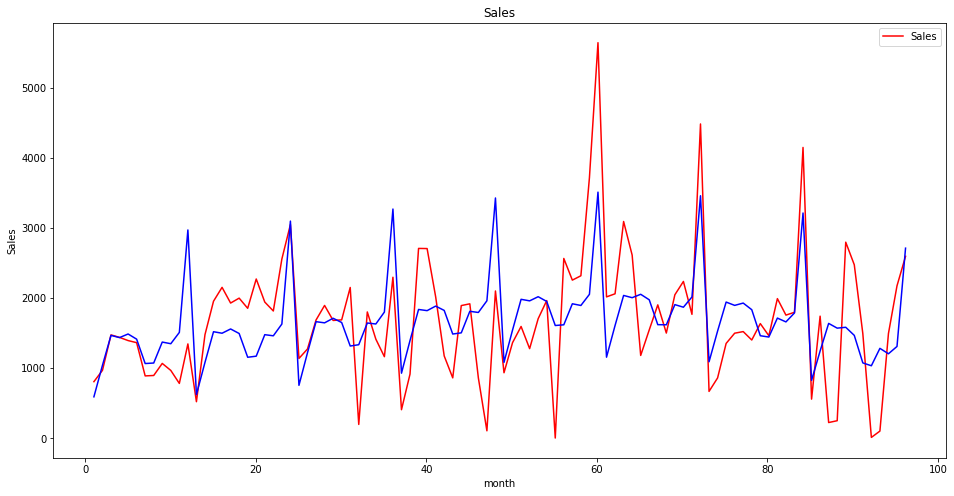

In [38]:
time_axis = np.linspace(1,500,499)
plt.figure(figsize = (16, 8))
plt.plot(time_axis[0:96],np.array(training_set.iloc[:,1]), 'r')
plt.plot(time_axis[0:96], result.get_prediction().predicted_mean, 'b')
plt.xlabel("month")
plt.ylabel("Sales")
plt.title("Sales")
plt.legend(['Sales'])
plt.show()

In [39]:
# using our model estimated at trainging set on the test set 
result2=result.predict(test_set)
# the residuals on the test set
resids_test1=test_set.iloc[:,1] - result2
#MSE MAPE RMSE on the test set.
MAPE_test = (np.mean(abs(np.array(resids_test1))/np.array(test_set.iloc[:,1])))
print('MAPE of Test Set = ', MAPE_test)
mse_test1= np.mean(np.square(resids_test1))
rmse_test1 = np.sqrt(mse_test1)
print('MSE Test  =', mse_test1)
print('RMSE Test =', rmse_test1 )

MAPE of Test Set =  23.39591810032875
MSE Test  = 25055427.428572852
RMSE Test = 5005.539674058418


In [40]:
 # Running a linear regression with 11 dummies (no dummy at May) with t,tsq and tcube
lm = sm.OLS.from_formula('Sales ~ t + Jan + Dec ', training_set) 
result = lm.fit() # results of the OLS regression

In [41]:
print(result.summary())

#R^2 value is nearly the same, and  dummies at Jan and Dec is statistically significant also the trend term t has P value
# as 0.307 can be counted as statistically significant. 
# Reduced model shows us that reduced model has nearly performs as well as previous full-model. This shows that, the predictors of the previous
# model contains unnecessary predictors.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     13.58
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.07e-07
Time:                        17:46:24   Log-Likelihood:                -773.45
No. Observations:                  96   AIC:                             1555.
Df Residuals:                      92   BIC:                             1565.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1470.7058    164.729      8.928      0.0

In [42]:
MSE1= np.mean(np.square(result.resid)) # retrieving the residiuals
RMSE1 = np.sqrt(MSE1) # computation of RMSE
MAPE1 = (np.mean(abs(np.array(result.resid))/np.array(training_set.iloc[:,1]))) # computation of MAPE
print('MAPE of Training Set = ', MAPE1)
print('MSE of Training Set =', MSE1)
print('RMSE of Training Set =', RMSE1)

MAPE of Training Set =  6.358164058264864
MSE of Training Set = 582829.2097656036
RMSE of Training Set = 763.4325181478738


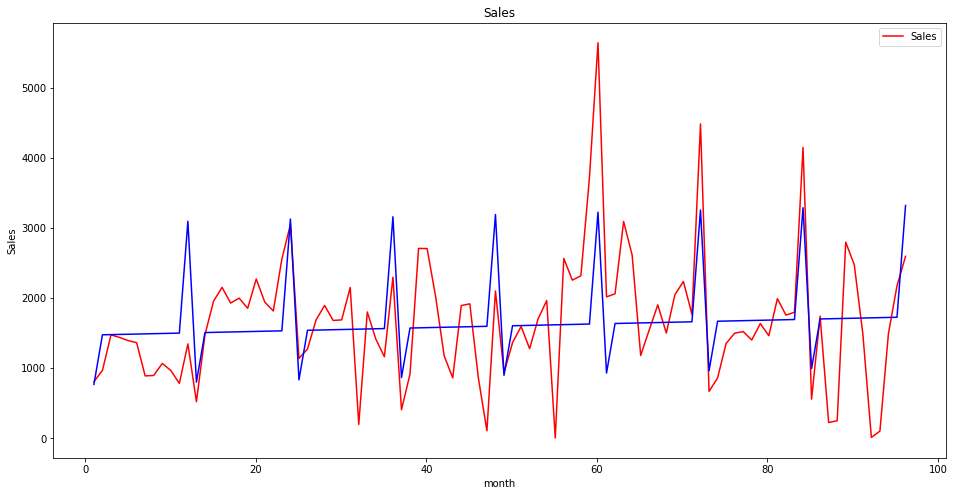

In [43]:
#printing the predictions
time_axis = np.linspace(1,500,499)
plt.figure(figsize = (16, 8))
plt.plot(time_axis[0:96],np.array(training_set.iloc[:,1]), 'r')
plt.plot(time_axis[0:96], result.get_prediction().predicted_mean, 'b')
plt.xlabel("month")
plt.ylabel("Sales")
plt.title("Sales")
plt.legend(['Sales'])
plt.show()

In [44]:
# using our model estimated at trainging set on the test set 
result2=result.predict(test_set)
# the residuals on the test set
resids_test1=test_set.iloc[:,1] - result2
#MSE MAPE RMSE on the test set.
MAPE_test = (np.mean(abs(np.array(resids_test1))/np.array(test_set.iloc[:,1])))
print('MAPE of Test Set = ', MAPE_test)
mse_test1= np.mean(np.square(resids_test1))
rmse_test1 = np.sqrt(mse_test1)
print('MSE Test  =', mse_test1)
print('RMSE Test =', rmse_test1 )

# Better results at test set since the overfitting issue is discarded by reducing our model parameters
# other parameters in the previous model should have caused some overfitting.
# In addition, previous model were nearly as succesful as the reduced model on the training set altough it was more complex
# and containing more parameters.

MAPE of Test Set =  5.996805470158495
MSE Test  = 2036163.8146224064
RMSE Test = 1426.942120277626


In [45]:
#read the data to a dataframe
df1 = pd.read_csv('Toyota_Sales_Up.csv', index_col=0, parse_dates=True)
training_set= df1[:96]# seperating data into training set
test_set= df1[96:168]# seperating data into test set

training_set.head()

,Sales,Up,Sup,Lag1,Lag2,Lag3,Jan,Dec
Index,,,,,,,,
1.0,808.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2.0,969.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0
3.0,1475.0,1.0,1.0,161.0,NaN,NaN,0.0,0.0
4.0,1439.0,0.0,0.0,506.0,161.0,NaN,0.0,0.0
5.0,1394.0,0.0,0.0,-36.0,506.0,161.0,0.0,0.0


In [46]:
# since we have a predictor at lag 3, we can start making predictions at month 5 
training_set1=training_set[5:]

In [47]:
# Defining model to fit with Lag1 , Lag2 ,Lag3 and monthly indicators: Jan and Dec
formula = 'Up ~ Lag1+Lag2+Lag3+ Jan +Dec'

In [48]:
model1 = smf.glm(formula = formula, data=training_set1, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()
# results shows us that indicators at Dec and Jan are insignificant since their P values are 0.999
# the lag1 lag2 lag3 are statistically significant
# that means ups and downs are not realted with the monthly indicators.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     Up   No. Observations:                   92
Model:                            GLM   Df Residuals:                       86
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.315
Date:                Fri, 29 Apr 2022   Deviance:                       86.630
Time:                        17:46:25   Pearson chi2:                     71.2
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3479
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2034      0.260      0.783      0.434      -0.306       0.713
Lag1          -0.0014      0.000     -3.347      0.001      -0.002      -0.001
Lag2          -0.0009      0.000     -2.653      0.008      -0.002      -0.000
Lag3          -0.0005      0.000     -1.813      0.070      -0.001     4.2e-05
Jan          -21.9276   2.66e+04     -0.001      0.999   -5.21e+04     5.2e+04
Dec           24.1444   2.47e+04      0.001      0.999   -4.84e+04    4.85e+04
==============================================================================
"""

In [49]:
#Predicting the probabilities 
predictions1 = result1.predict() 
# assigning 1/2 as treshold to classify the results as 1 or 0 
# if the probabilities are higher than 1/2 than it would be classified as class 1 
pthreshold = 0.5
predictions1_class = [ 1 if x > pthreshold else 0 for x in predictions1]
print(predictions1_class)

[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]


In [50]:
# based on confusion matrix
# total error rate calculated: (15+10)/92
# we were able to predict 42 out of the 52 up periods as up
# the model predicted 25 out of 40 down periods
print(confusion_matrix(training_set1.iloc[:,1], predictions1_class))

[[25 15]
 [10 42]]


In [51]:
#report
print(classification_report(training_set1.iloc[:,1], predictions1_class))

              precision    recall  f1-score   support

         0.0       0.71      0.62      0.67        40
         1.0       0.74      0.81      0.77        52

    accuracy                           0.73        92
   macro avg       0.73      0.72      0.72        92
weighted avg       0.73      0.73      0.73        92



In [52]:
# AUC score 
# it is close to 1 which is great
from sklearn.metrics import roc_auc_score
roc_auc_score(training_set1.iloc[:,1], predictions1_class)

0.7163461538461539

In [53]:
# checking the error performance of the model on the test set
# error rate is 21/73
# model catches 36 of 39 ups 
predictions_test=result1.predict(test_set)
threshold=0.5
predictions2_class_test = [ 1 if x > threshold else 0 for x in predictions_test] 
print(confusion_matrix(np.array(test_set.iloc[:,1]), predictions2_class_test))

[[16 18]
 [ 3 36]]


In [54]:
print(classification_report(np.array(test_set.iloc[:,1]), predictions2_class_test))

              precision    recall  f1-score   support

         0.0       0.84      0.47      0.60        34
         1.0       0.67      0.92      0.77        39

    accuracy                           0.71        73
   macro avg       0.75      0.70      0.69        73
weighted avg       0.75      0.71      0.69        73



In [55]:
print(roc_auc_score(np.array(test_set.iloc[:,1]), predictions2_class_test))
# AUC is lower in test set and is a little far from 1 

0.6968325791855203


In [56]:
# Defining model to fit with Lag1 , Lag2 , and monthly indicator: Dec 
formula = 'Up ~ Lag1+Lag2+Dec'

In [57]:
model1 = smf.glm(formula = formula, data=training_set1, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()
# results shows us that indicator at Dec  are insignificant since their P values are 0.999
# the lag1 lag2  are statistically significant
# that means ups and downs are not realted with the monthly indicators.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     Up   No. Observations:                   92
Model:                            GLM   Df Residuals:                       88
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46.700
Date:                Fri, 29 Apr 2022   Deviance:                       93.401
Time:                        17:46:28   Pearson chi2:                     79.0
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2981
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1378      0.251      0.548      0.583      -0.355       0.631
Lag1          -0.0013      0.000     -3.598      0.000      -0.002      -0.001
Lag2          -0.0006      0.000     -2.328      0.020      -0.001   -9.66e-05
Dec           22.9513   1.51e+04      0.002      0.999   -2.96e+04    2.96e+04
==============================================================================
"""

In [58]:
#Predicting the probabilities  with reduced model
predictions1 = result1.predict() 
# assigning 1/2 as treshold to classify the results as 1 or 0 
# if the probabilities are higher than 1/2 than it would be classified as class 1 
pthreshold = 0.5
predictions1_class = [ 1 if x > pthreshold else 0 for x in predictions1]
print(predictions1_class)

[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]


In [59]:
# based on confusion matrix
# total error rate calculated: (12+10)/92 which is worse than the full model
# we were able to predict 42 out of the 52 up periods as up
# there is an Improvment in this model that we catch more down periods compared to full model
# 28 out of 40 of downs are predicted correctly !!!!!!!!!
print(confusion_matrix(training_set1.iloc[:,1], predictions1_class))

[[28 12]
 [10 42]]


In [60]:
#report of reduced model on training set
print(classification_report(training_set1.iloc[:,1], predictions1_class))

              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72        40
         1.0       0.78      0.81      0.79        52

    accuracy                           0.76        92
   macro avg       0.76      0.75      0.76        92
weighted avg       0.76      0.76      0.76        92



In [61]:
# AUC score 
# it is close to 1 which is great and it is better than the full model
from sklearn.metrics import roc_auc_score
roc_auc_score(training_set1.iloc[:,1], predictions1_class)

0.7538461538461538

In [62]:
# checking the error performance of the reduced model on the test set
# error rate is 26/73 better than full model !!!
# model catches 33 of 39 ups  full model is better !!!!!
# model catches 14 of 34 of downs worse than previous model !!
predictions_test=result1.predict(test_set)
threshold=0.5
predictions2_class_test = [ 1 if x > threshold else 0 for x in predictions_test] 
print(confusion_matrix(np.array(test_set.iloc[:,1]), predictions2_class_test))

[[14 20]
 [ 6 33]]


In [63]:
print(classification_report(np.array(test_set.iloc[:,1]), predictions2_class_test))

              precision    recall  f1-score   support

         0.0       0.70      0.41      0.52        34
         1.0       0.62      0.85      0.72        39

    accuracy                           0.64        73
   macro avg       0.66      0.63      0.62        73
weighted avg       0.66      0.64      0.62        73



In [64]:
print(roc_auc_score(np.array(test_set.iloc[:,1]), predictions2_class_test))
# AUC is lower in test set and lower than full-model in terms of test set and is a little far from 1 

0.6289592760180995
